In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Load dataset
file_path = "heart_disease_uci.csv"  # Update path if needed
df = pd.read_csv(file_path)


## Exploratory data analysis

In [3]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [6]:
# 🔹 Check for missing values
print("\n❌ Missing Values:")
print(df.isnull().sum())


❌ Missing Values:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [7]:
# 🔹 Summary statistics
print("\n📊 Summary Statistics:")
print(df.describe())


📊 Summary Statistics:
               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  309.000000  920.000000  
mean     0.676375    0.995652  
std      0.935653    1.142693  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      1.000000    2.

In [8]:
# 🔹 Check class distribution of the target variable
print("\n📌 Target Variable Distribution:")
print(df['num'].value_counts())



📌 Target Variable Distribution:
num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


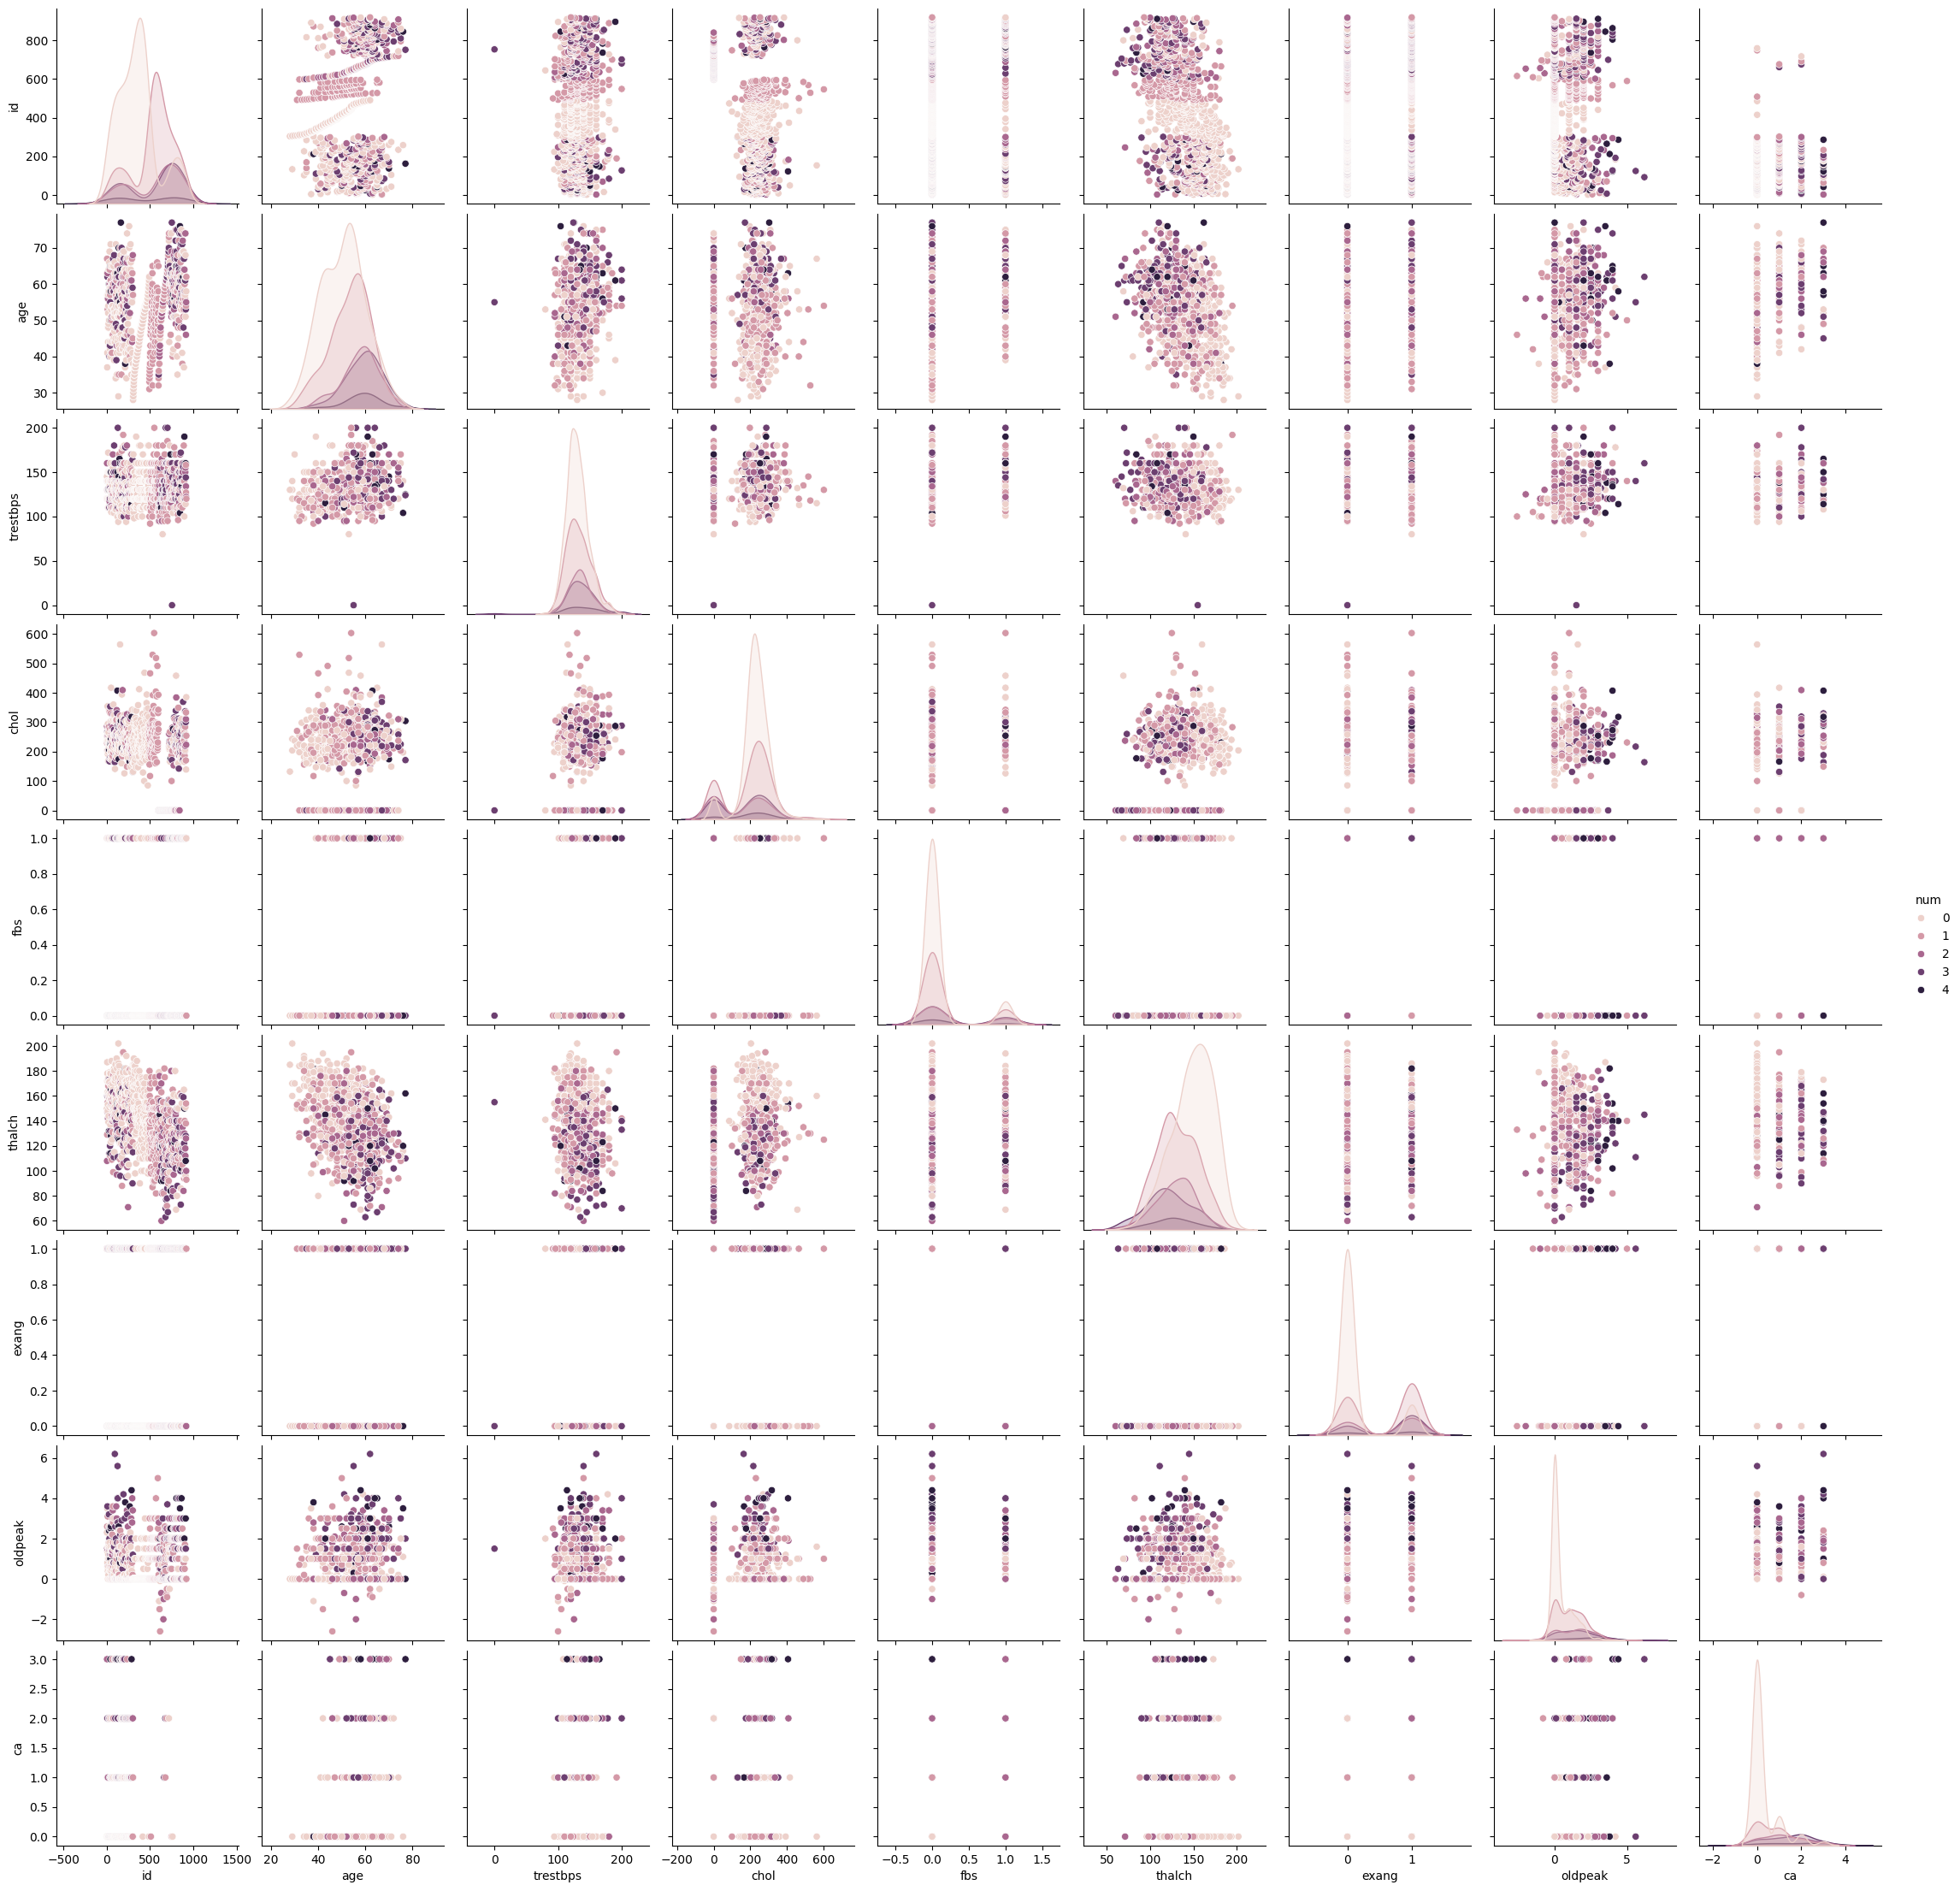

In [11]:
# 🔹 Pairplot for feature relationships
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df, hue="num", diag_kind="kde")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


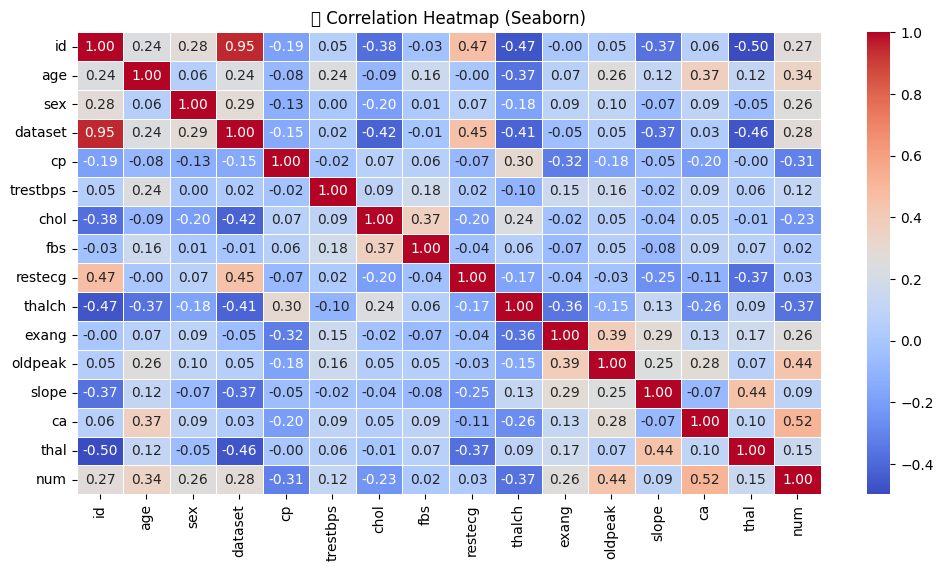

In [14]:
# 🔹 Plot correlation heatmap
# Convert categorical variables to numeric using Label Encoding
df_encoded = df.copy()

# Identify categorical columns
categorical_cols = df_encoded.select_dtypes(include=['object']).columns

# Convert categorical columns using label encoding
for col in categorical_cols:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Compute correlation matrix
corr_matrix = df_encoded.corr()

# Plot correlation heatmap using Seaborn
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("📊 Correlation Heatmap (Seaborn)")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


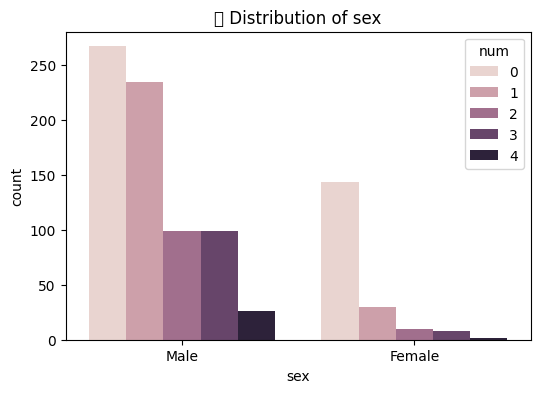

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


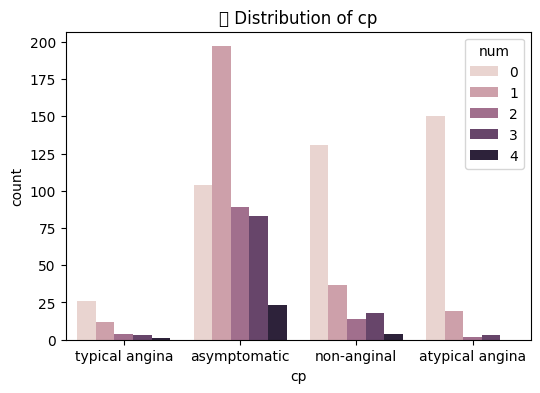

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


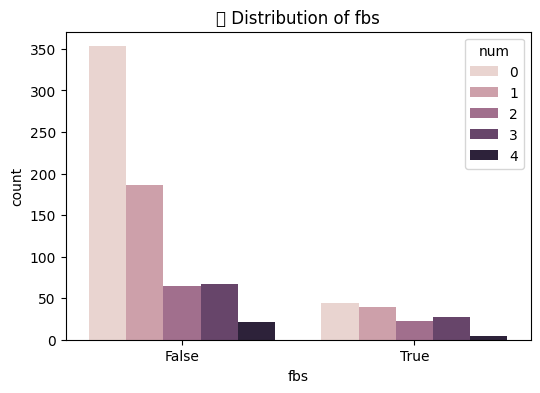

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


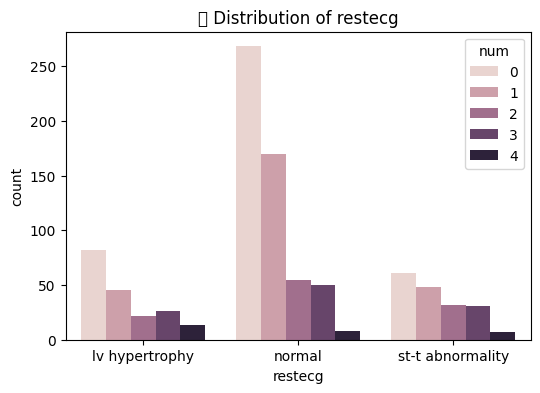

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


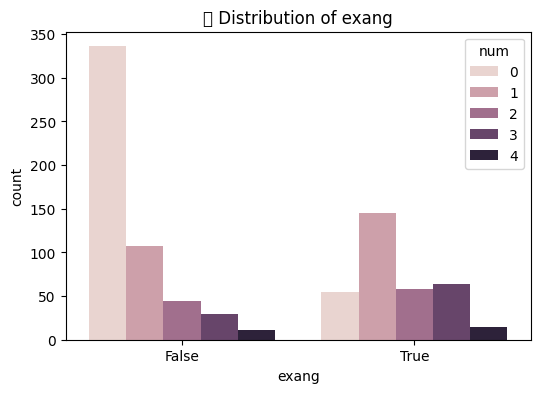

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


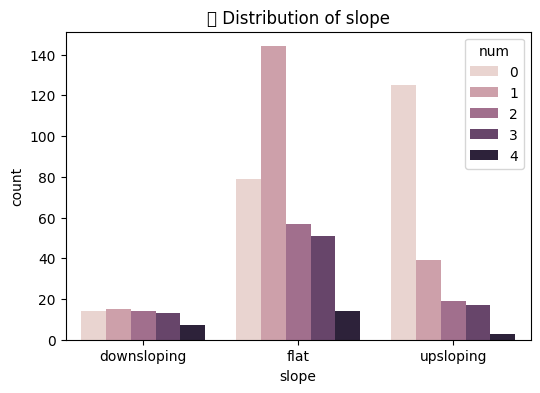

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


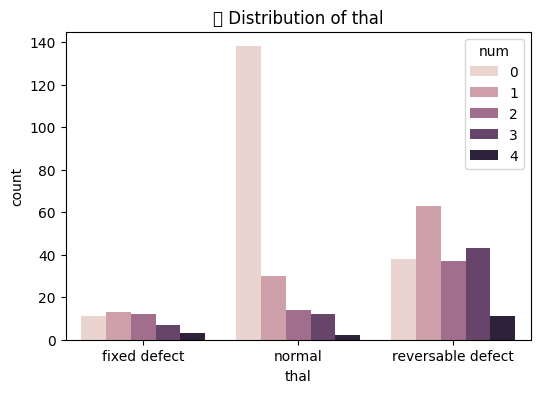

In [15]:
# 🔹 Count plot for categorical features
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col], hue=df["num"])
    plt.title(f"📌 Distribution of {col}")
    plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


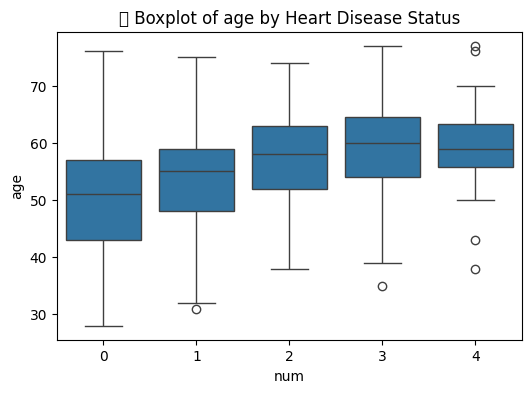

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


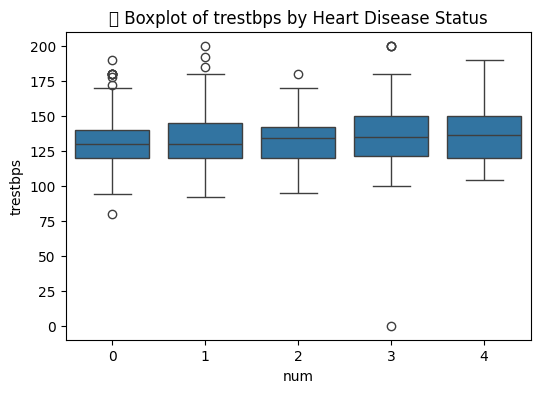

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


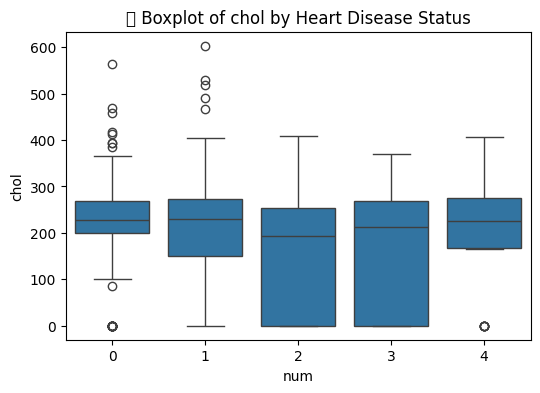

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


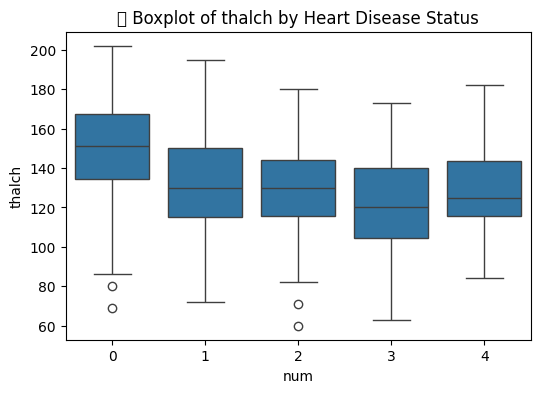

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


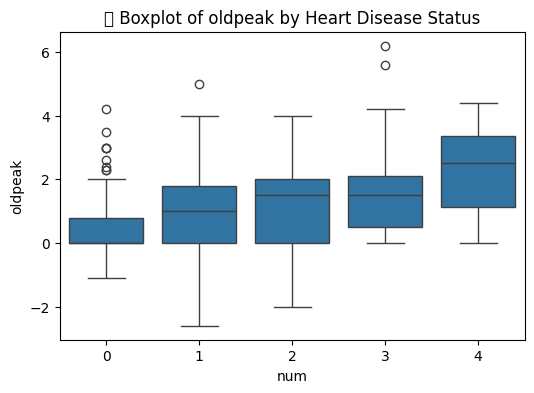

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


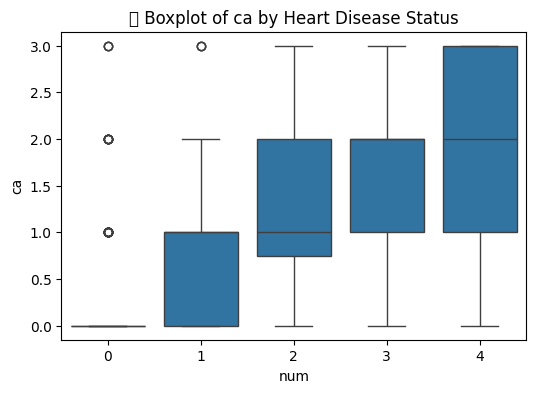

In [16]:
# 🔹 Box plots to detect outliers
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df["num"], y=df[col])
    plt.title(f"📌 Boxplot of {col} by Heart Disease Status")
    plt.show()

In [17]:
# Drop unnecessary columns
df = df.drop(columns=['id', 'dataset'], errors='ignore')


In [18]:
# Convert target variable: presence of heart disease (num > 0 -> 1, else 0)
df['num'] = (df['num'] > 0).astype(int)

In [19]:
# Fill missing numerical values with the median
numerical_cols = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

In [20]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder, StandardScaler
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col].astype(str))

In [21]:
#Split into features and target
X = df.drop(columns=['num'])
y = df['num']


In [22]:
# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Define ANN model
def build_ann():
    model = keras.Sequential([
        layers.Dense(32, activation='relu', input_shape=(X.shape[1],)),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [25]:
# Define CNN model
def build_cnn():
    model = keras.Sequential([
        layers.Reshape((X.shape[1], 1, 1), input_shape=(X.shape[1],)),
        layers.Conv2D(16, (3, 1), activation='relu', padding='same'),
        layers.Flatten(),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [26]:
# Define LSTM model
def build_lstm():
    model = keras.Sequential([
        layers.Reshape((X.shape[1], 1), input_shape=(X.shape[1],)),
        layers.LSTM(16, activation='relu', return_sequences=False),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [27]:
#Define Autoencoder model
def build_autoencoder():
    encoder = keras.Sequential([
        layers.Dense(8, activation='relu', input_shape=(X.shape[1],))
    ])
    decoder = keras.Sequential([
        layers.Dense(X.shape[1], activation='sigmoid')
    ])
    autoencoder = keras.Sequential([encoder, decoder])
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder


In [28]:
# Initialize models
ann = build_ann()
cnn = build_cnn()
lstm = build_lstm()
autoencoder = build_autoencoder()


C:\Users\bosss\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\bosss\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
# Train all models
ann.fit(X_train, y_train, epochs=20, batch_size=16, verbose=0)
cnn.fit(X_train, y_train, epochs=20, batch_size=16, verbose=0)
lstm.fit(X_train, y_train, epochs=20, batch_size=16, verbose=0)
autoencoder.fit(X_train, X_train, epochs=20, batch_size=16, verbose=0)

In [30]:
# Evaluate models
ann_acc = ann.evaluate(X_test, y_test, verbose=0)[1]
cnn_acc = cnn.evaluate(X_test, y_test, verbose=0)[1]
lstm_acc = lstm.evaluate(X_test, y_test, verbose=0)[1]

In [31]:
# Autoencoder evaluation (reconstruction loss)
autoencoder_loss = autoencoder.evaluate(X_test, X_test, verbose=0)

In [32]:
# Print results
print(f"ANN Accuracy: {ann_acc:.4f}")
print(f"CNN Accuracy: {cnn_acc:.4f}")
print(f"LSTM Accuracy: {lstm_acc:.4f}")
print(f"Autoencoder Loss: {autoencoder_loss:.4f}")


ANN Accuracy: 0.7228
CNN Accuracy: 0.8152
LSTM Accuracy: 0.8315
Autoencoder Loss: 7220.4404
